In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dsml_lab_dataset/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
data = df.drop_duplicates(subset = "variety")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
100,6.3,3.3,6.0,2.5,Virginica


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

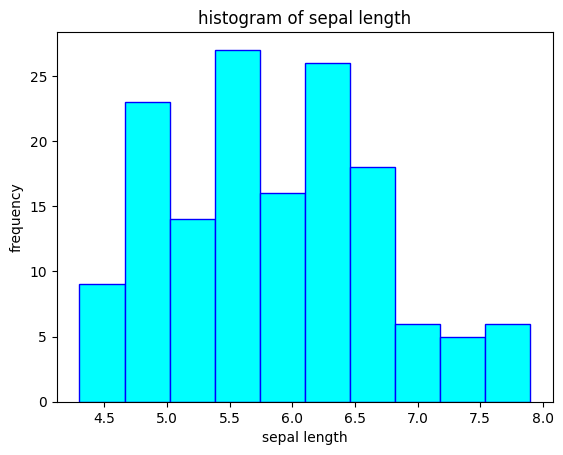

In [ ]:
plt.hist(df['sepal.length'], color="cyan", edgecolor="blue")
plt.xlabel("sepal length")
plt.ylabel("frequency")
plt.title("histogram of sepal length")
plt.show()

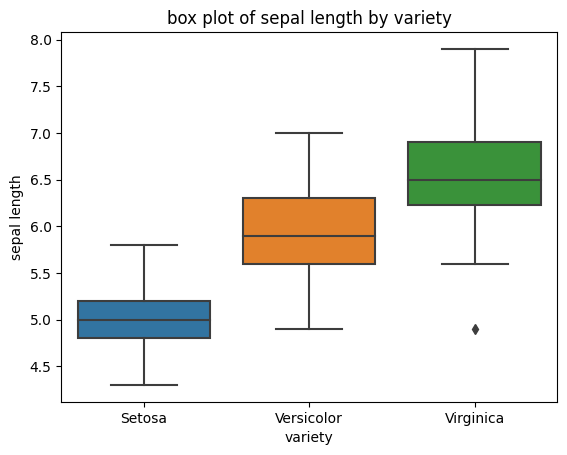

In [ ]:
sns.boxplot(x='variety', y='sepal.length', data=df)
plt.title("box plot of sepal length by variety")
plt.xlabel("variety")
plt.ylabel("sepal length")
plt.show()

<ipython-input-20-14cfc4a26e65>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="sepal.length", hue="variety", shade=True)


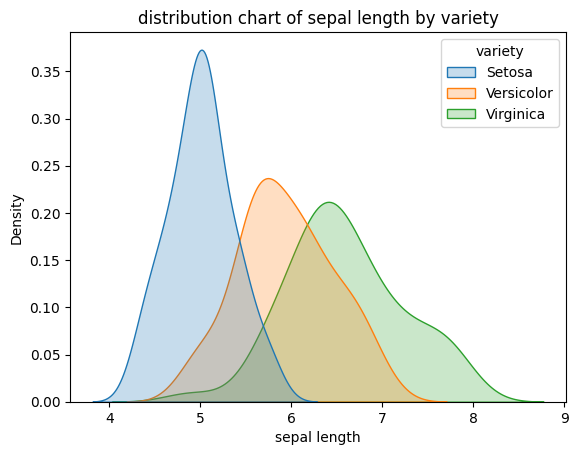

In [ ]:
sns.kdeplot(data=df, x="sepal.length", hue="variety", shade=True)
plt.title("distribution chart of sepal length by variety")
plt.ylabel("Density")
plt.xlabel("sepal length")
plt.show()

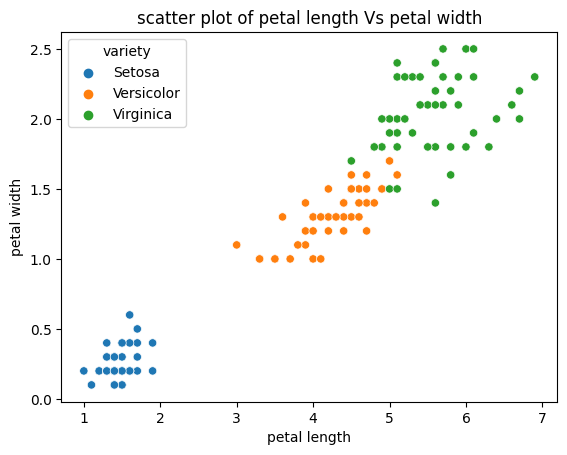

In [ ]:
sns.scatterplot(data=df, x="petal.length", y="petal.width", hue="variety")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("scatter plot of petal length Vs petal width")
plt.show()

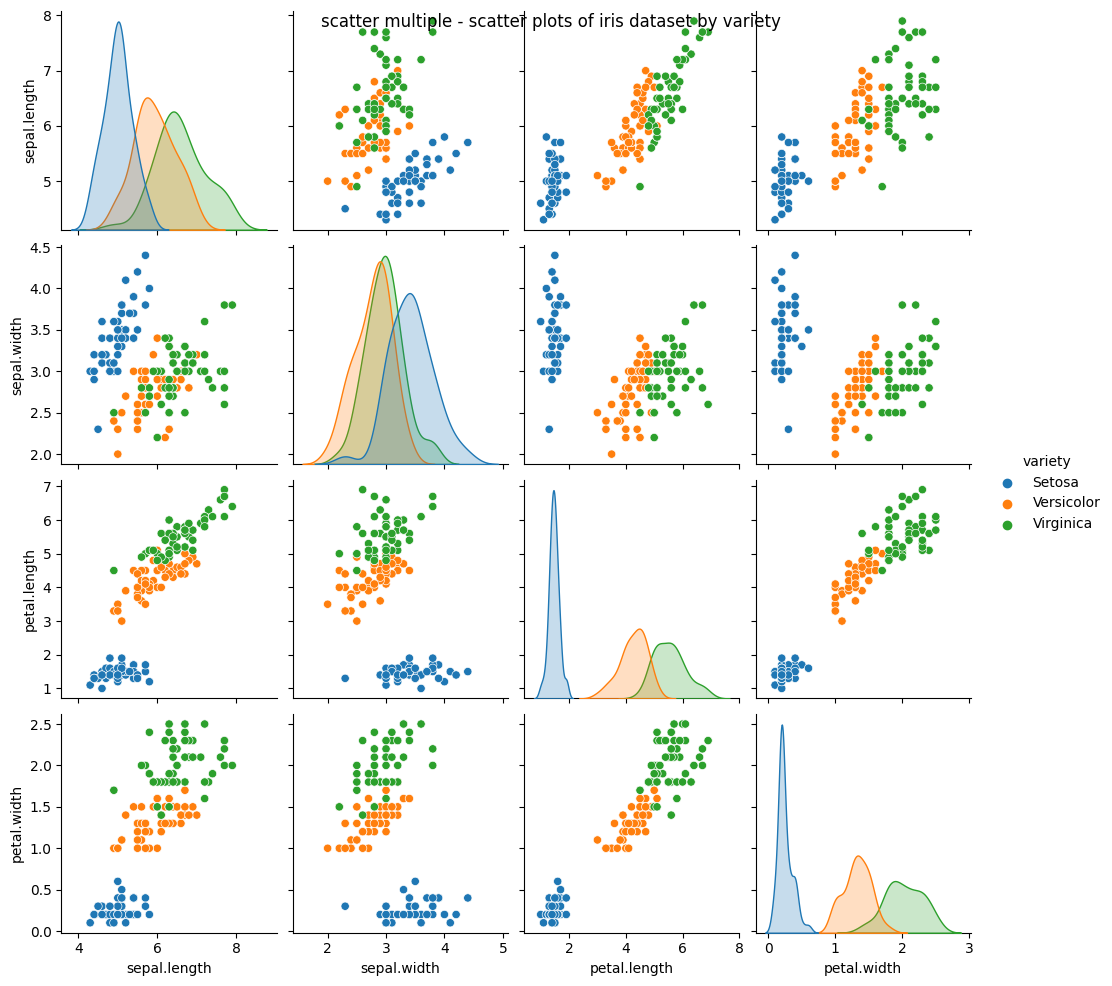

In [ ]:
sns.pairplot(data=df, hue="variety")
plt.suptitle("scatter multiple - scatter plots of iris dataset by variety")
plt.show()

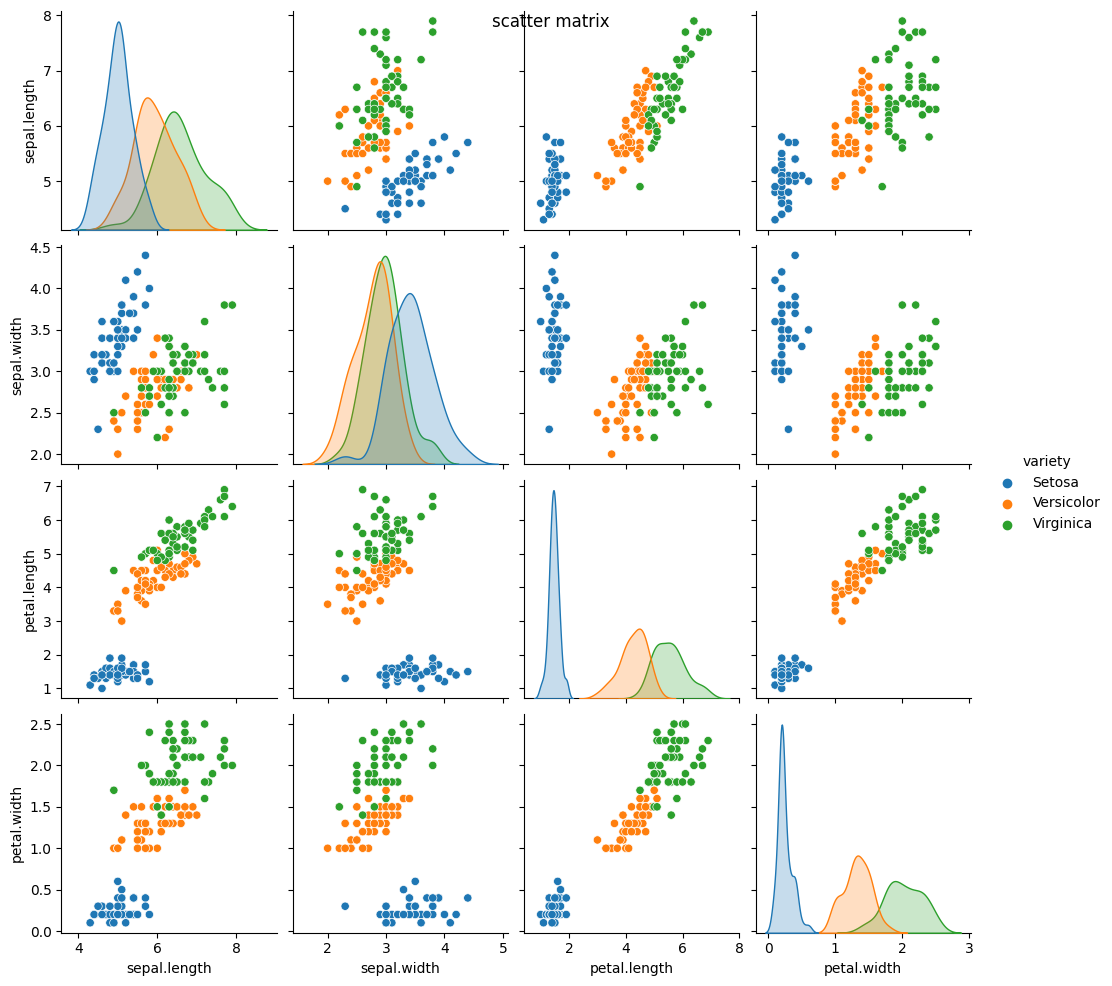

In [ ]:
sns.pairplot(df, hue="variety", diag_kind="kde")
plt.suptitle("scatter matrix")
plt.show()

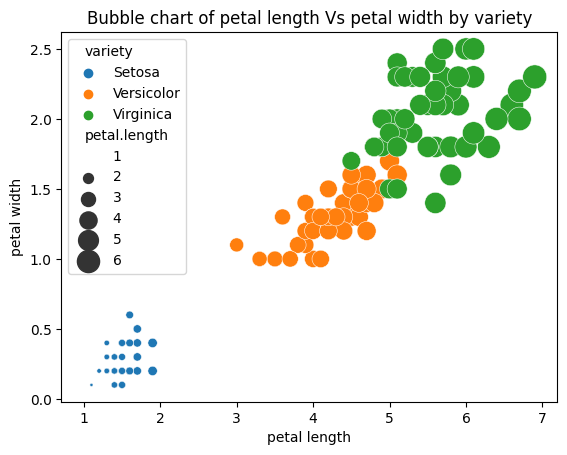

In [ ]:
sns.scatterplot(data=df, x="petal.length", y="petal.width", hue="variety", size="petal.length", sizes=(0,300))
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("Bubble chart of petal length Vs petal width by variety")
plt.show()

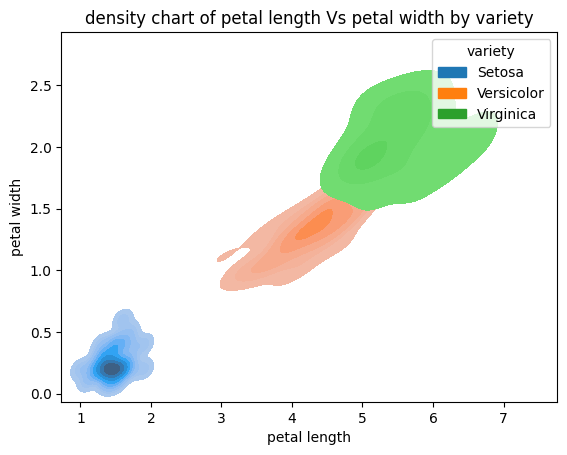

In [ ]:
sns.kdeplot(data=df, x="petal.length", y="petal.width", hue="variety", fill=True)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("density chart of petal length Vs petal width by variety")
plt.show()

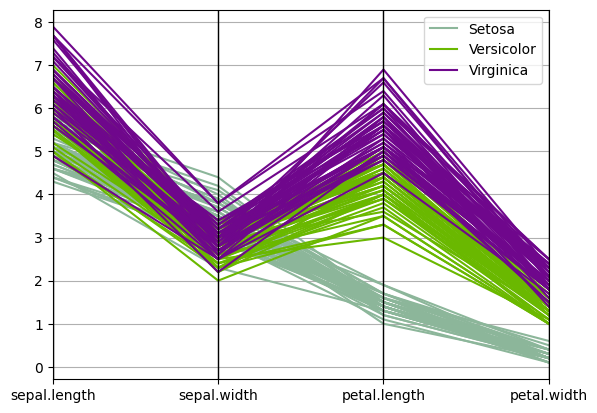

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
parallel_coordinates(df, "variety")
plt.show()


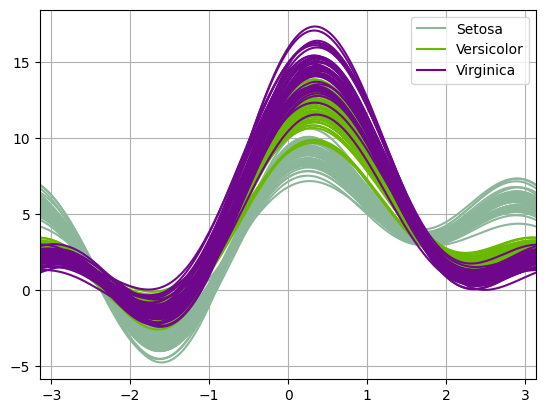

In [ ]:
# Creating Andrews curves
x = pd.plotting.andrews_curves(df, 'variety')

# plotting the Curve
x.plot()

# Display
plt.show()

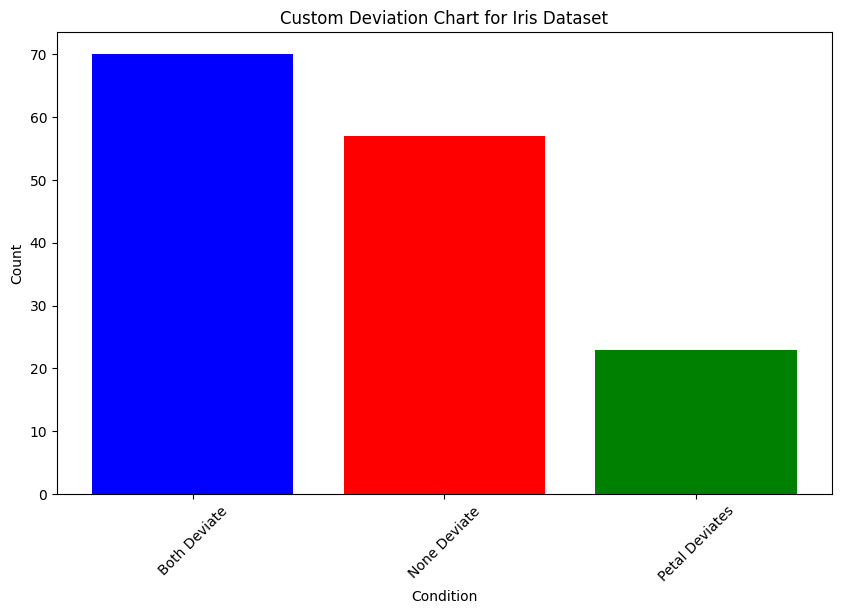

In [ ]:
import numpy as np
# Calculate deviations from the mean for sepal length and petal length
df['sepal.length_dev'] = df['sepal.length'] - df['sepal.length'].mean()
df['petal.length_dev'] = df['petal.length'] - df['petal.length'].mean()

# Define conditions for deviation chart
conditions = [
    (df['sepal.length_dev'] > 0) & (df['petal.length_dev'] > 0),
    (df['sepal.length_dev'] > 0) & (df['petal.length_dev'] <= 0),
    (df['sepal.length_dev'] <= 0) & (df['petal.length_dev'] > 0),
    (df['sepal.length_dev'] <= 0) & (df['petal.length_dev'] <= 0)
]

# Define labels for conditions
labels = ['Both Deviate', 'Sepal Deviates', 'Petal Deviates', 'None Deviate']

# Create a custom deviation chart
df['condition'] = np.select(conditions, labels, default='None Deviate')

# Count the occurrences of each condition
condition_counts = df['condition'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Count']

# Create a bar chart for the deviation chart
plt.figure(figsize=(10, 6))
plt.bar(condition_counts['Condition'], condition_counts['Count'],
        color=['blue', 'red', 'green', 'gray'])
plt.title("Custom Deviation Chart for Iris Dataset")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()